# Analysis Work

* In this notebook, I will analyze the data that I have already scraped, downloaded, and cleaned.
* In particular, I will run three main tests in order to prove or reject the main hypotheses of the literature.
* My hypotheses: Scholars argue that Black abolitionist rhetoric became (1) more civic-oriented and nationalistic, (2) increasingly focused on self-identification, and (3) progressively more demanding after the year 1840. 
* My tests: I tested each of these in turn. For the first two, I employed frequency tests and keyness analysis to understand which time period employed more terms relating to Black nationalism and Black identity. I also used a key word in context (KWIC) analysis to test for external validity. For testing whether the rhetoric became more demanding, I utilized VADER (Valence Aware Dictionary for Sentiment Reasoning) sentiment analysis. I found and compared the average sentiments score of each corpus. Once again, I employed KWIC analysis to test whether there was external validity in my results.

## Set up notebook

In [5]:
import os
  
import matplotlib.pyplot as plt
from collections import Counter
import json
import pickle

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import seaborn as sns

In [6]:
os.chdir('/Commjhub/jupyterhub/comm318_fall2019/sstrickberger/comm313_S21/comm313_S21_Final_Project')

In [7]:
os.getcwd()

'/Commjhub/jupyterhub/comm318_fall2019/sstrickberger/comm313_S21/comm313_S21_Final_Project'

In [8]:
%run data_analysis/functions.ipynb

In [19]:
#Let's load in our saved lists from the clean corpus

In [9]:
file_placeholder = open('data/clean/clean_pages_post_1840', 'rb')

In [10]:
clean_pages_post_1840 = pickle.load(file_placeholder)

In [11]:
file_placeholder_2 = open('data/clean/clean_pages_pre_1840', 'rb')

In [12]:
clean_pages_pre_1840 = pickle.load(file_placeholder_2)

In [13]:
#take a look at a page

clean_pages_pre_1840[1]

[' portunities that others have for acquiring an educa- ',
 'tion, and how many can know nothing but what their  ',
 '',
 'fathers and mothers teach them.  Except from their  ',
 '',
 'parents, they can learn nothing.  Oh! then let parents  ',
 '',
 'be faithful, and lay before them the nature of slavery,  ',
 '',
 'and teach them to strive against it.  Do not let the  ',
 '',
 'influence of this assembly fall dead here.  Let it go  ',
 '',
 'out against that dreadful system.  Scarcely has the  ',
 'dawn of effort begun.  It seems but yesterday that we  ',
 'first heard of these efforts, and yet what progress!   ',
 '',
 'And should we not rejoice?  Should we not come  ',
 '',
 'together to be glad, and to form good resolutions?  I  ',
 '',
 'hope the next speaker may be able to say more to  ',
 '',
 'strengthen you to do the things that are right, in be- ',
 '',
 'half of our brethren under the lash.  I am grieved  ',
 '',
 'when I see apathy among us.  It sometimes seems as  ',
 '',


## Frequency analyses: monograms, bigrams, trigrams

* I broke down each corpus -- pre and post 1840 writings -- into their 25 most common monograms, bigrams, trigrams.
* I ran this as a preliminary analysis to better understand the most common words and phrases of each corpus.
* Some key findings are below


### Pre-1840 Frequency analyses (monograms, bigrams, trigrams)
Key findings: 
* These corpus has a big emphasis, at least among the trigrams, on self identification. This challenges my initial hypothesis.
* The "we" is important in the monograms. These are black abolitionists fighting for their own freedom. They seek to be self-reliant and were in many ways, despite the overwhelming pop-notion that the abolitionist movement only contained wealthy white individuals


In [25]:
characters_to_strip = '().[]!,"'

# frequencies for pre 1840

pages_list_pre_1840 = str()
for page_num in range(len(clean_pages_pre_1840)):
    new_page = ''.join(clean_pages_pre_1840[page_num])
    pages_list_pre_1840 = pages_list_pre_1840 + new_page

tokens = tokenize(pages_list_pre_1840, True, characters_to_strip)

monograms = get_ngram_tokens(tokens, 1)

bigrams = get_ngram_tokens(tokens, 2)

trigrams = get_ngram_tokens(tokens, 3)


trigram_dist = Counter()
trigram_dist.update(trigrams)

bigram_dist = Counter()
bigram_dist.update(bigrams)

monogram_dist = Counter()
monogram_dist.update(monograms)

print('Pre-1840 TRIGRAMS:', trigram_dist.most_common(25))
print('BIGRAMS:', bigram_dist.most_common(25))
print('MONOGRAMS:', monogram_dist.most_common(25))

Pre-1840 TRIGRAMS: [('people of color', 56), ('the cause of', 55), ('the people of', 54), ('the united states', 53), ('committee of vigilance', 40), ('of the colored', 39), ('the rights of', 33), ('of the people', 33), ('the colonization society', 32), ('the colored man', 32), ('one of the', 31), ('the colored american', 31), ('in relation to', 29), ('of the committee', 29), ('the libel suit', 28), ('in this country', 27), ('the spirit of', 26), ('in behalf of', 26), ('as well as', 25), ('of the american', 25), ('of the most', 24), ('in the united', 24), ('relation to the', 23), ('of the free', 23), ('some of the', 22)]
BIGRAMS: [('of the', 1364), ('in the', 640), ('to the', 586), ('and the', 310), ('it is', 273), ('for the', 253), ('to be', 236), ('of our', 231), ('on the', 217), ('that the', 194), ('from the', 183), ('by the', 181), ('with the', 164), ('of a', 163), ('in this', 153), ('have been', 147), ('of his', 146), ('of this', 137), ('at the', 133), ('we are', 121), ('of their',

### Pre-1840 Frequency analyses (monograms, bigrams, trigrams)
Key findings: 
* These corpus has a big emphasis, at least among the trigrams, on civic minded rhetoric. For example, the most common three include: "('the united states', 358), ('in this country', 177), ('of the united', 173)." This confirms my initial hypothesis.
* It is interesting that "we" is missing in the top 25 most common monograms of this corpus. Perhaps, the authors were more focused on talking about "the black man" or the "colored people" in the third person, then in the first person.

In [26]:

#frequencies for post 1840

pages_list_post_1840 = str()
range_post = len(clean_pages_post_1840)

for page_num in range(range_post):
    new_page = ''.join(clean_pages_post_1840[page_num])
    pages_list_post_1840 = pages_list_post_1840 + new_page

tokens_post = tokenize(pages_list_post_1840, True, characters_to_strip)

monograms_post = get_ngram_tokens(tokens_post, 1)

bigrams_post = get_ngram_tokens(tokens_post, 2)

trigrams_post = get_ngram_tokens(tokens_post, 3)


trigram_dist_post = Counter()
trigram_dist_post.update(trigrams_post)

bigram_dist_post = Counter()
bigram_dist_post.update(bigrams_post)

monogram_dist_post = Counter()
monogram_dist_post.update(monograms_post)

print('TRIGRAMS:', trigram_dist_post.most_common(25))
print('BIGRAMS:', bigram_dist_post.most_common(25))
print('MONOGRAMS:', monogram_dist_post.most_common(25))

TRIGRAMS: [('the united states', 358), ('in this country', 177), ('of the united', 173), ('one of the', 168), ('of the slave', 140), ('in the united', 135), ('the cause of', 122), ('of the country', 120), ('as well as', 115), ('the people of', 114), ('the black man', 114), ('of the american', 113), ('he did not', 108), ('the colored people', 104), ('the coloured people', 91), ('i do not', 91), ('of the colored', 88), ('the colored man', 88), ('of the free', 86), ('of the world', 86), ('of the most', 86), ('the state of', 85), ('that he was', 85), ('the history of', 85), ('people of the', 84)]
BIGRAMS: [('of the', 6406), ('in the', 3195), ('to the', 2353), ('and the', 1439), ('to be', 1150), ('for the', 1005), ('by the', 1003), ('that the', 1001), ('on the', 898), ('it is', 884), ('from the', 808), ('with the', 769), ('it was', 740), ('of his', 690), ('of a', 688), ('in this', 643), ('he was', 632), ('of this', 619), ('at the', 552), ('of our', 544), ('he had', 533), ('of their', 485), 

In [27]:
monogram_dist_post.most_common(25)

[('the', 38242),
 ('of', 23881),
 ('and', 19214),
 ('to', 16358),
 ('in', 11449),
 ('a', 8953),
 ('that', 7959),
 ('he', 5792),
 ('was', 5009),
 ('it', 4630),
 ('is', 4573),
 ('i', 4183),
 ('for', 4165),
 ('as', 3971),
 ('be', 3894),
 ('not', 3765),
 ('this', 3748),
 ('his', 3746),
 ('they', 3457),
 ('by', 3433),
 ('with', 3423),
 ('have', 2991),
 ('their', 2974),
 ('which', 2970),
 ('but', 2963)]

In [28]:
trigram_dist_post.most_common(25)[1][0]

'in this country'

In [29]:
#calculate_keyness(monogram_dist, monogram_dist_post)

### Data visualization: I'm going to organize the trigrams into a chart for my final paper

In [30]:

#pull out post trigrams
trigrams_25 = [trigram_dist_post.most_common(25)[X][0] for X in range(0,25)]

post_political_trigram_data = {'Post-1840 Rank': range(1,26),
                'Trigram': trigrams_25}

post_political_trigram_data_frame = pd.DataFrame(post_political_trigram_data)
post_political_trigram_data_frame

,Post-1840 Rank,Trigram
0,1,the united states
1,2,in this country
2,3,of the united
3,4,one of the
4,5,of the slave
5,6,in the united
6,7,the cause of
7,8,of the country
8,9,as well as
9,10,the people of


In [31]:
#pull our pre trigrams
trigrams_25_pre = [trigram_dist.most_common(25)[X][0] for X in range(0,25)]

pre_political_trigram_data = {'Pre-1840 Rank': range(1,26),
                'Trigram': trigrams_25_pre}

pre_political_trigram_data_frame = pd.DataFrame(pre_political_trigram_data)
pre_political_trigram_data_frame

,Pre-1840 Rank,Trigram
0,1,people of color
1,2,the cause of
2,3,the people of
3,4,the united states
4,5,committee of vigilance
5,6,of the colored
6,7,the rights of
7,8,of the people
8,9,the colonization society
9,10,the colored man


### Comparing trigram frequencies
* Here I am comparing the trigram frequencies of key words related to civic engagement and nationalism. I want to get a better sense of how each corpus compares in this regard. 

Key findings:
* In almost every category, civic and nationalist rhetoric is more common after 1840, even after a crude weighting system. (I multiplied the pre-1840 frequencies by 6 to make up for the difference in corpus size.)

In [32]:
print('the united states in pre:',trigram_dist['the united states']*6)
print('the united states in post:', trigram_dist_post['the united states'])

the united states in pre: 318
the united states in post: 358


In [33]:
print('in this country in pre:', trigram_dist['in this country']*6)
print('in this country in post:', trigram_dist_post['in this country'])

in this country in pre: 162
in this country in post: 177


In [34]:
print('nation in pre:', monogram_dist['nation']*6)
print('nation in post:', monogram_dist_post['nation'])

nation in pre: 294
nation in post: 326


In [35]:
print('n*gro usuage in pre:', monogram_dist['negro']*6)
print('n*gro usage in post:', monogram_dist_post['negro'])


n*gro usuage in pre: 30
n*gro usage in post: 390


In [36]:
print('colored in pre:', monogram_dist['colored']*6 + monogram_dist['coloured']*6)
print('colored in post:', monogram_dist_post['colored'] + monogram_dist_post['coloured'])

colored in pre: 1302
colored in post: 1333


In [37]:
pre_size = len(tokens)
post_size = len(tokens_post)

In [38]:
print("There are", pre_size + post_size,"words in total.")

There are 666978 words in total.


In [39]:
log_likelihood(trigram_dist.get('in this country'), pre_size,
               trigram_dist_post.get('in this country'), post_size)

-3.3743935058198247

In [40]:
top_post = trigram_dist_post.most_common(20)

In [41]:
top_pre = trigram_dist.most_common(20)

In [42]:
#Let's run a keyness analysis for the top 20 most common words for each era
#NOTE: Most of these, at least for post, are political -- which is exactly my argument.

## keyness analysis

* It is now time to delve deeper than our preliminary analysis. We will engage in a keyness analysis. 
* I want to more empirically test whether nationalist and civic rhetoric increased after 1840. 
* I ran three analyses: two comparing the most common trigrams used in each corpus. Then one comparing a list of words that the literature and myself deemed politically oriented such as "United States" and "vote."

Key findings:
* This sort of rhetoric did increase after 1840. 
* "United" and "Vote" were both more likely to appear after 1840.
* Interestingly, "rights" and "civic" were more likely to occur before 1840. 
* "Right," however, was more likely to occur after 1840.
* Political language had a log-likelihood of 32.45527681242794 to occur post 1840.

### Compare most common trigrams from post-1840 

In [43]:
# run this for aall keyness keywords!!
#the most common words for post-1840 versus those of pre-1840

row_template = "{: <15}{: <8}{:0.2f}\t\t{: <10}{:0.2f}\t{: 0.2f}"

for word, freq in top_post:
    post = freq
    pre = trigram_dist.get(word,0)
    norm_post = post/post_size * 1000
    norm_pre = pre/pre_size * 1000

    LL = 0 if pre==0 else log_likelihood(post, post_size, pre, pre_size)
    print(row_template.format(word, post, norm_post, pre, norm_pre, LL))

the united states358     0.65		53        0.44	 7.85
in this country177     0.32		27        0.23	 3.37
of the united  173     0.32		21        0.18	 7.64
one of the     168     0.31		31        0.26	 0.81
of the slave   140     0.26		20        0.17	 3.58
in the united  135     0.25		24        0.20	 0.94
the cause of   122     0.22		55        0.46	-17.72
of the country 120     0.22		17        0.14	 3.17
as well as     115     0.21		25        0.21	 0.00
the people of  114     0.21		54        0.45	-19.49
the black man  114     0.21		3         0.03	 27.60
of the american113     0.21		25        0.21	-0.00
he did not     108     0.20		7         0.06	 14.10
the colored people104     0.19		21        0.18	 0.12
the coloured people91      0.17		5         0.04	 13.96
i do not       91      0.17		9         0.08	 6.46
of the colored 88      0.16		39        0.33	-12.05
the colored man88      0.16		32        0.27	-5.51
of the free    86      0.16		23        0.19	-0.69
of the world   86      0.16		17    

### Compare most common trigrams from pre-1840 

In [44]:
# run this for aall keyness keywords!!
#the most common words for pre-1840 versus those of post-1840
row_template = "{: <15}{: <8}{:0.2f}\t\t{: <10}{:0.2f}\t{: 0.2f}"

for word, freq in top_pre:
    pre = freq
    post = trigram_dist_post.get(word,0)
    norm_post = post/post_size * 1000
    norm_pre = pre/pre_size * 1000

    LL = 0 if post==0 else log_likelihood(pre, pre_size, post, post_size)
    print(row_template.format(word, pre, norm_pre,post, norm_post,  LL))

people of color56      0.47		10        0.02	 139.95
the cause of   55      0.46		122       0.22	 17.72
the people of  54      0.45		114       0.21	 19.49
the united states53      0.44		358       0.65	-7.85
committee of vigilance40      0.33		2         0.00	 121.95
of the colored 39      0.33		88        0.16	 12.05
the rights of  33      0.28		79        0.14	 8.75
of the people  33      0.28		63        0.12	 14.66
the colonization society32      0.27		21        0.04	 46.94
the colored man32      0.27		88        0.16	 5.51
one of the     31      0.26		168       0.31	-0.81
the colored american31      0.26		5         0.01	 79.33
in relation to 29      0.24		13        0.02	 52.68
of the committee29      0.24		6         0.01	 69.81
the libel suit 28      0.23		0         0.00	 0.00
in this country27      0.23		177       0.32	-3.37
the spirit of  26      0.22		74        0.14	 3.94
in behalf of   26      0.22		58        0.11	 8.26
as well as     25      0.21		115       0.21	-0.00
of the america

### Compare political  monograms in each corpus

In [45]:
# monogram of political words
political_words = ["united", "states", "country", "nation", 
                   "citizen", "citizenship", #"enfranchisement", 
                   "right", "rights", "civil", "man", "vote"]

In [46]:
row_template = "{: <15}{: <8}{:0.2f}\t\t{: <10}{:0.2f}\t{: 0.2f}"
post_total = 0
pre_total = 0

for word in political_words:
    post = monogram_dist_post.get(word,0)
    post_total = post_total + post
    pre = monogram_dist.get(word,0)
    pre_total = pre_total + pre
    norm_post = post/post_size * 1000
    norm_pre = pre/pre_size * 1000

    LL = 0 if pre==0 else log_likelihood(post, post_size, pre, pre_size)
    print(row_template.format(word, post, norm_post, pre, norm_pre, LL))

united         492     0.90		90        0.75	 2.61
states         866     1.58		117       0.98	 27.34
country        1023    1.87		163       1.36	 15.50
nation         326     0.60		49        0.41	 6.67
citizen        94      0.17		16        0.13	 0.93
citizenship    39      0.07		0         0.00	 0.00
right          502     0.92		75        0.63	 10.57
rights         423     0.77		134       1.12	-12.87
civil          63      0.12		31        0.26	-12.15
man            1754    3.21		355       2.96	 1.94
vote           115     0.21		5         0.04	 21.20


In [47]:
#What is the aggregate?

norm_post_total = post_total/post_size*1000
norm_pre_total =  pre_total/pre_size*1000

#norm_post_total
#norm_pre_total

log_likelihood(post_total, post_size, pre_total, pre_size)

32.45527681242794

In [48]:
LL_total = log_likelihood(post, post_size, pre, pre_size)
print(row_template.format("Political words total", post, norm_post, pre, norm_pre, LL))

Political words total115     0.21		5         0.04	 21.20


In [49]:
type(bigram_dist)

collections.Counter

In [50]:
#calculate_keyness(bigram_dist, bigram_dist_post)

In [51]:
#calculate_keyness(trigram_dist, trigram_dist_post)

### KWIC for external validity

* Let's better understand how each of these words are used. Do they match our assumptions and are they thus useful for our analysis?
* I found that our assumptions hold. The use of "United" and "Vote" occurs just like we would imagine. The former refers to the "United States" very often and the latter to the ability to participate in democracy.

In [52]:
random.seed(5) #set seed for replication

#run KWIC

post_states_kwic=make_kwic('states', tokens_post)

sample_states_post_kwic =random.sample(post_states_kwic,10)

sort_kwic(sample_states_post_kwic, order=['R1','L1'])

[[['surround-', 'ing', 'the', 'united'],
  'states',
  ['became', 'free', 'and', 'were']],
 [['adoption', 'of', 'the', 'united'],
  'states',
  ['constitution;', 'they', 'voted', 'in']],
 [['president', 'of', 'the', 'united'],
  'states',
  ['has', 'been', 'solicited', 'by']],
 [['however', 'in', 'the', 'southern'],
  'states',
  ['hear', 'where', 'honest', 'labour']],
 [['even', 'in', 'the', 'free'], 'states', ['let', 'but', 'one', 'drop']],
 [['as', 'existingin', 'these', 'united'],
  'states',
  ['lincoln', 'as', 'manhad', 'no']],
 [['to', 'keep', 'these', 'four'],
  'states',
  ['loyal', 'we', 'will', 'notinterfere']],
 [['them', 'in', 'the', 'united'], 'states', ['they', 'did', 'not', 'want']],
 [['ritories', 'of', 'the', 'united'],
  'states',
  ['tremendous', 'cheering', 'the', 'speaker']],
 [['all', 'the', 'sixteen', 'northern'],
  'states',
  ['which', 'allowed', 'theblack', 'child']]]

In [53]:
#run KWIC

post_states_kwic=make_kwic('vote', tokens_post)

sample_states_post_kwic =random.sample(post_states_kwic,10)

sort_kwic(sample_states_post_kwic, order=['R1','L1'])

[[['you', 'support', 'by', 'your'], 'vote', ['a', 'sys-', 'tem', 'that']],
 [['two', 'brothers', 'going', 'to'],
  'vote',
  ['and', 'because', 'one', 'was']],
 [['real-', 'estate', 'he', 'could'],
  'vote',
  ['but', 'not', 'otherwisešin', 'short']],
 [['that', 'time', 'given', 'your'], 'vote', ['for', 'a', 'man', 'who']],
 [['a', 'speech', 'moved', 'a'], 'vote', ['of', 'thanks', 'to', 'the']],
 [['and', 'carried', 'unanimously', 'a'],
  'vote',
  ['of', 'thanks', 'to', 'the']],
 [['and', 'carried', 'unanimously', 'a'],
  'vote',
  ['of', 'thanks', 'to', 'the']],
 [['men', 'were', 'allowed', 'to'], 'vote', ['of', 'real', 'estate', 'in']],
 [['men', 'were', 'allowed', 'to'], 'vote', ['of', 'real', 'estate', 'in']],
 [['boxes', 'and', 'demanded', 'to'],
  'vote',
  ['the', 'judges', 'knowing', 'they']]]

## Second phase of analysis: rhetoric of identification

* This analysis is very similar to the one above. I create a set of words of whose frequencies I want to compare between the two corpora. This time my object is understanding of identity rhetoric increases.

Key findings:
* "black", "negro", "colored", and "african" are all more likely to occur post-1840
* "coloured" is more likely to occur pre-1840
* In total, identity rhetoric is more common in the post-1840 (log-likelihood is 145.50964421332822)

In [54]:
# monogram of identification words
identification_words = ["black", "negro", "colored", "coloured", "african"]

In [55]:
row_template = "{: <15}{: <8}{:0.2f}\t\t{: <10}{:0.2f}\t{: 0.2f}"
post_total = 0
pre_total = 0
    
for word in identification_words:
    post = monogram_dist_post.get(word,0)
    post_total = post_total + post
    pre = monogram_dist.get(word,0)
    pre_total = pre_total + pre
    norm_post = post/post_size * 1000
    norm_pre = pre/pre_size * 1000

    LL = 0 if pre==0 else log_likelihood(post, post_size, pre, pre_size)
    print(row_template.format(word, post, norm_post, pre, norm_pre, LL))

black          456     0.83		26        0.22	 67.66
negro          390     0.71		5         0.04	 118.20
colored        819     1.50		200       1.67	-1.81
coloured       514     0.94		17        0.14	 111.72
african        251     0.46		13        0.11	 40.52


In [56]:
#What is the aggregate?

norm_post_total = post_total/post_size*1000
norm_pre_total =  pre_total/pre_size*1000

#norm_post_total
#norm_pre_total

print('post_total:', post_total)
print('pre_total:', pre_total)
print('log_likelihood:' ,log_likelihood(post_total, post_size, pre_total, pre_size))

post_total: 2430
pre_total: 261
log_likelihood: 145.50964421332822


### KWIC to confirm external validity of ID rhetoric results

* I want to confirm that we have external validity here, as we did above. So let's pull up some random sentences with our key words to see if the words are contextualized the way we were assuming.
* Key finding: words like "Black" and "colored" are used exactly as we would have thought. For example, "Black man" and "Black population." 

In [57]:
#run KWIC for ID analysis in pre-1840

for word in identification_words:

    pre_ID_kwic=make_kwic(word, tokens)

    sample_ID_pre_kwic = random.sample(pre_ID_kwic,5)

    print(word, "|",sort_kwic(sample_ID_pre_kwic, order=['R1','L1']))


black | [[['and', 'powers', 'than', 'a'], 'black', ['man', 'can', 'exhibit', 'these']], [['the', 'question', 'cheers;', 'the'], 'black', ['man', 'was', 'then', 'considered']], [['the', 'execution', 'of', 'two'], 'black', ['men', 'one', 'of', 'whom']], [['callous', 'indifference', 'to', 'the'], 'black', ['population', 'however', 'cruelly', 'used']], [['patty', 'is', 'a', 'free'], 'black', ['womanﬂ', '&c', 'a', 'committee']]]
negro | [[['distinguished', 'friend', 'of', 'the'], 'negro', ['george', 'thompson', 'enthusiastic', 'applause']], [['the', 'editor', 'of', 'a'], 'negro', ['newspaper', 'in', 'the', 'united']], [['without', 'a', 'parallel', 'even'], 'negro', ['slavery', 'horrible', 'as', 'it']], [['of', 'slavery', 'generally', 'termed'], 'negro', ['slavery', 'i', 'cannot', 'probably']], [['we', 'shall', 'begin', 'with'], 'negro', ['slavery', 'what', 'have', 'been']]]
colored | [[['believed', 'and', 'as', 'the'], 'colored', ['american', 'informed', 'its', 'readers']], [['on', 'behalf'

In [58]:
#run KWIC for ID analysis in post-1840

for word in identification_words:

    post_ID_kwic=make_kwic(word, tokens_post)

    sample_ID_post_kwic = random.sample(post_ID_kwic,10)

    print(word, "|",sort_kwic(sample_ID_post_kwic, order=['R1','L1']))


black | [[['rare', 'books', 'and', 'manuscripts'], 'black', ['abolitionist', 'archives', 'doc', 'no']], [['of', 'all', 'white', 'and'], 'black', ['and', 'it', 'is', 'not']], [['as', 'well', 'as', 'the'], 'black', ['are', 'so', 'ruthlessly', 'striken']], [['kind', 'whether', 'he', 'be'], 'black', ['as', 'night', 'or', 'white']], [['white', 'man', 'and', 'the'], 'black', ['ceasesto', 'exist', 'only', 'when']], [['of', 'freedom', 'and', 'the'], 'black', ['man', 'are', 'countrymen', 'of']], [['union', 'bayonet', 'protected', 'the'], 'black', ['man', 'his', 'heart', 'was']], [['war', 'a', 'number', 'of'], 'black', ['men', 'werefound', 'silly', 'enough']], [['have', 'passed', 'and', '200000'], 'black', ['minervas', 'fully', 'armed', 'have']], [['crushedthe', 'energies', 'of', 'the'], 'black', ['race;', 'their', 'motto', 'was']]]
negro | [[['cost', 'has', 'made', 'the'], 'negro', ['both', 'lever', 'and', 'fulcrum']], [['and', 'muscles', 'of', 'the'], 'negro', ['hundreds', 'of', 'millions', 'o

## Third Phase of Analysis: Sentiment Analysis

In [59]:
sid = SentimentIntensityAnalyzer()

In [60]:
#sentiment anaalsysi for whole pre 1840 texts
#sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens)

In [61]:
#sentiment anaalsysi for whole post 1840 texts
#sum([sid.lexicon.get(tok.lower(),0) for tok in tokens])/len(tokens_post)

### Polarity tests

* The goal is to better understand the sentiment of the different corpora. I want to know if one appears more demanding/aggressive than the other. I imagine this will be post 1840.


Key findings:
* Post-1840 has an average polarity score of 0.380679
* Pre-1840 has an average polarity score of 0.548832
* The difference is significant bc I ran a t test and the t value 1.96
    

In [62]:
#testing out the sentiment scores
print(sid.polarity_scores('happy happy')['compound'])
print(sid.polarity_scores('sad')['compound'])

0.8126
-0.4767


In [63]:
# We are finding the pre 1840 PS scores

pre_ps_list = []

for X in range(0,len(clean_pages_pre_1840)):

    test_page = clean_pages_pre_1840[X]
    test_str = ''.join(test_page)
    pre_ps_list.append(sid.polarity_scores(test_str)['compound'])
    
    
pre_ps_list[:5]

[0.9986, -0.7413, 0.9878, 0.6184, 0.9481]

In [64]:
# What is the pre-1840 ps mean?
pre_sum = 0
for ele in pre_ps_list:
    pre_sum += ele
res = pre_sum / len(pre_ps_list)
res

0.5488318396226409

In [65]:
# We are finding the post 1840 PS scores
post_ps_list = []

for X in range(0,len(clean_pages_post_1840)):

    test_page = clean_pages_post_1840[X]
    test_str = ''.join(test_page)
    post_ps_list.append(sid.polarity_scores(test_str)['compound'])
    
    
post_ps_list[:5]

[0.9674, 0.9841, 0.9489, 0.7269, -0.8966]

In [66]:
# What is the post-1840 ps mean?
sum = 0
for ele in post_ps_list:
    sum += ele
res = sum / len(post_ps_list)
res

0.3806785064624225

In [67]:
#prelim work for data table

all_ps_list_df = []

for X in range(0,len(pre_ps_list)):

    all_ps_list_df.append(pre_ps_list[X])

for X in range(0,len(post_ps_list)):
    
    all_ps_list_df.append(post_ps_list[X])
    
#(len(pre_ps_list)+1)
    #test_page = clean_pages_post_1840[X]
    #test_str = ''.join(test_page)
    #post_ps_list.append(sid.polarity_scores(test_str)['compound'])

len(all_ps_list_df)

#create binary values
binary_values = []

[binary_values.append("Pre-1840") for count in clean_pages_pre_1840]  #add as many ones as pre pages
[binary_values.append("Post-1840") for count in clean_pages_post_1840] #add as many ones as post pages

len(binary_values)

2513

In [68]:
data = {'Category': binary_values,
                'values': all_ps_list_df}

data_frame = pd.DataFrame(data)
data_frame

,Category,values
0,Pre-1840,0.9986
1,Pre-1840,-0.7413
2,Pre-1840,0.9878
3,Pre-1840,0.6184
4,Pre-1840,0.9481
...,...,...
2508,Post-1840,-0.9809
2509,Post-1840,0.9385
2510,Post-1840,-0.1027
2511,Post-1840,-0.9008


### Let's try to run a t-test

In [91]:
# Are you doing spot checking on this? I have to...

# Need to understand/interpret these numbers.

# Look at the neutral score to get a sense.

# For the story, take a look at very positive ones or really negative ones. 

# Look at a few of them to see what is driving this.

from scipy.stats import ttest_ind

pre_sentiment = data_frame[data_frame['Category']=='Pre-1840']
post_sentiment = data_frame[data_frame['Category']=='Post-1840']

ttest_ind(pre_sentiment['values'], post_sentiment['values'])

# Ttest_indResult(statistic=4.155434042863994, pvalue=3.3553338776211344e-05)
#|t|≥1.96

#HERE

#data is signficant here because it is above 1.96 t value

Ttest_indResult(statistic=4.155434042863994, pvalue=3.3553338776211344e-05)

In [78]:
sttest_ind(pre_sentiment['values'], post_sentiment['values'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [70]:
#find means of the differnet corupsus sentiment scores

data_frame.groupby("Category")['values'].mean()

Category
Post-1840    0.380679
Pre-1840     0.548832
Name: values, dtype: float64

### Set up data frame for graphs
- I want to be able to display the range of findings so the reader can better understand the numbers we are working with

Key results:
* I found, most significantly, that the results are bi-modal. Meaning, most scores fell closer to the extremes of 1 and -1, instead of closer to the middle.

In [71]:

data_frame.groupby("Category")['values']

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='values', ylabel='Density'>

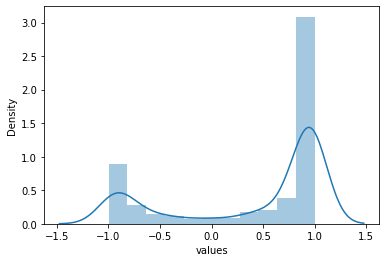

In [72]:
#shows that the sentiments are logged as pretty extreme
sns.distplot(data_frame["values"])

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


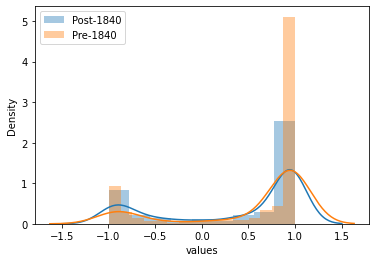

In [73]:
sns.distplot(data_frame[data_frame["Category"]=="Post-1840"]["values"], label = "Post-1840")
sns.distplot(data_frame[data_frame["Category"]=="Pre-1840"]["values"], label = "Pre-1840")
plt.legend()

In [74]:
#histogram
sn.displot(data_frame, x = "values", hue = "Category")

NameError: name 'sn' is not defined

In [ ]:
#estimator of the histogram
#bimodal.
# you have two peaks in both dsiturbitnos. Instead of a normal dist, where most of the
#pages are netural. This highlights that there are a bunch of neutral values,
# which the negative/pos values assume.


# kind = kde (density), hist (histogram)
sns.displot(data_frame, x = "values", hue = "Category", kind = "kde")

In [ ]:
def score_page(plist):
    ptxt = '\n'.join(plist)
    pscores = sid.polarity_scores(ptxt)
    
    # use nltk wordpunct tokenizer
    tokens = tokenize.wordpunct_tokenize(ptxt.lower())
    
    
    print('-'*40, '\n', ptxt, '\n', '-'*40)
    print(pscores, '\n')
    
    for i,s in sid.lexicon.items():
        if i in tokens:
            print(i,s)

### Let's test our sentiment analysis for external validity
- We will sample out a few pages that are in the extreme ranges and a few pages that are in the moderate pages. So four tests overall (extreme + and -; moderate + and -)
- We found that the vader results are actually pretty accurate. At least more than we thought previously. Very negative results make sense as do the very positive ones when comparing with a manual analysis of each page.

In [ ]:
print(len(clean_pages_pre_1840))
len(clean_pages_post_1840)

#HERE!!!

In [246]:
clean_pages_secure = clean_pages_pre_1840
len(clean_pages_secure)


5046

In [243]:
all_pages = clean_pages_pre_1840
range_end = len(clean_pages_post_1840)
for X in range(0,range_end):
    all_pages.append(clean_pages_post_1840[X])
    
len(clean_pages_pre_1840)

5046

In [232]:
all_pages = clean_pages_pre_1840

for X in range(0,len(clean_pages_post_1840)):
    all_pages.append(clean_pages_post_1840[X])

print('pre pages:',len(clean_pages_pre_1840))
print('post pages:',len(clean_pages_post_1840))
print('all pages:',len(all_pages))


pre pages: 2513
post pages: 2089
all pages: 2513


In [141]:
# looking for page indices with a compound score <-0.9
for i,p in enumerate(clean_pages_pre_1840):
    s = sid.polarity_scores('\n'.join(p))
    if s['compound']<-0.9:
        print(i)

30
33
34
39
58
66
97
98
107
110
114
138
146
153
155
160
164
181
192
206
217
229
247
258
268
269
280
281
293
295
301
302
307
329
339
340
345
350
355
362


In [144]:
#let's test out a few of these
#extreme pages to see if there is external validity

score_page(clean_pages_pre_1840[362])

---------------------------------------- 
   tion forbade the idea of their removing; and  

hence in 1817, the people of color in Phila- 

delphia, with James Forten at their head,Š 

(and I envy them the honor they had in the  

work in which they were engaged,) in an as- 

sembly of three thousand, before high hea- 

ven, in the presence of Almighty God, and  
in the midst of a persecuting nation, resolv- 
ed that they never would leave the land.Š 

They resolved to cling to their oppressed  

brethren.  They felt that every ennobling spir- 

it forbade their leaving them.  They resolv- 

ed to remain here, come what would, perse- 

cution or death.  They determined to grap- 

ple themselves to their enslaved brethren as  

with hooks of steel.  My father, at Schenec- 
tady, under great anxiety, took a journey to  
Philadelphia, to investigate the subject.Š 

This was the spirit to which prevailed among  

the people of color, and it extended to every  

considerable place in the no

In [181]:
#let's test out a few of these
#extreme pages to see if there is external validity

score_page(clean_pages_pre_1840[153])

---------------------------------------- 
     The Rev. N. Paul came forward to move  
the next resolution.  It was scarcely neces- 

sary, he said, to detain the meeting by any  

remarks of his, after the able report which  

they had heard, but nevertheless as a native  
of the United States, and intimately con- 
nected with the slave population of that  

country as a man of color, he would take the  

liberty of addressing a few words to them.   

Having read the resolution, Mr. Paul pro- 

ceeded to say, in regard to the first proposi- 

tion contained in it, that it was self-evident  

that in order to put an end to the traffic in  

slaves, slavery itself must be abolished.   
The husbandman who was engaged in cul- 
tivating his fields would cease his employ- 

ment were there no market for its produce;  

the manufacturer would at once stop his  

machinery and dismiss his workmen were  

the market for his manufactures to be block- 

ed up; and in like manner, were slavery  


In [182]:
# looking for page indices with a compound score >0.9
for i,p in enumerate(clean_pages_pre_1840):
    s = sid.polarity_scores('\n'.join(p))
    if s['compound']>0.9:
        print(i)

0
2
4
5
6
8
10
11
12
13
14
15
16
19
20
22
24
27
32
35
36
37
38
40
41
42
43
45
46
47
48
50
51
52
53
54
55
56
57
59
62
63
64
67
68
69
70
71
72
73
75
77
79
80
82
84
85
86
87
88
89
90
91
92
94
95
101
102
104
106
108
109
112
116
117
118
119
120
121
122
123
124
125
126
127
129
131
133
134
136
137
139
140
141
142
144
148
151
152
161
165
166
167
168
172
174
175
177
178
179
180
188
189
196
199
200
202
203
204
205
213
214
221
224
225
226
227
228
230
231
233
234
236
240
241
242
243
245
246
248
250
251
252
253
254
255
256
257
259
261
262
263
264
265
267
271
273
274
275
276
277
279
283
285
286
287
288
289
290
294
296
297
299
300
303
304
305
306
308
309
310
311
312
313
314
315
316
317
318
320
321
322
323
324
326
333
335
342
343
344
358
360
361
364
365
366
367
368
370
372
374
375
376
378
380
381
382
383
384
385
386
388
390
392
393
394
396
398
399
400
401
402
403
404
406
408
410
411
412
414
416
417
418
419
420
421
422


In [184]:
score_page(clean_pages_pre_1840[416])

---------------------------------------- 
     Since we have been brought out of darkness into  
light, we discover something ahead that we have not  
yet come up to.  It is that which is spoken of in the  

Declaration of Independence that 'all men are born  

free and equal;' but the sons of Africa are denied  
this freedom and equality, 
and, of course, are not  
men, but rather compared to baboons or some other  

dumb beasts.  But if we are men, and entitled to the  

rights of men, we would ask the people of this re- 

public whether we must fight for liberty in America,  
and go to Africa to possess it?  If so, we would have  
but little faith in such a warfare.  What recompense  

did the blacks get in fighting for liberty in the war  
of the revolution?  I think the answer may be 
  'Why, the negroes were recommended for their  
bravery.' 
  We perceive that a majority of the whites have  
an earnest desire for the removal of the blacks to  

Liberia, where they will be out of

In [183]:
score_page(clean_pages_pre_1840[75])

---------------------------------------- 
     Mr. Chairman, the ladies of this Society have request- 
ed me to read their Annual Report; but previous to  

complying with their desire, I would ask the liberty to  

make a few remarks upon a subject which is considered  

as an attribute, is one of the most prominent in the char- 

acter of God, and is daily sung by angels.  But as great  

as it is, man is permitted to take it up, and proclaim its  

merits.  It concerns all mankind, and it cannot be neg- 
lected without disregarding the happiness of our fellow  
creatures, and stifling that natural feeling which we sus- 

tain to each other.  My theme is 
Charity
; and the fact  
alone, that it is such a distinguished attribute of God, and  

that angels love and admire it, is sufficient to bespeak it a  

favorable hearing on this occasion.   
   ﬁMy country is the world 
 my countrymen are all  
mankind,ﬂ is the motto of the fearless champion of Am- 
erican liberty; and none but th

In [186]:
# looking for page indices with a moderate 
# negative compound score 
for i,p in enumerate(clean_pages_pre_1840):
    s = sid.polarity_scores('\n'.join(p))
    if s['compound']>-.4:
        if s['compound']<0:
            print(i)
        
#let's test out a few of these
#extreme pages to see if there is external validity



49
145
183
208
353


In [191]:
score_page(clean_pages_pre_1840[353])

---------------------------------------- 
    their political rights.  This was shown by Mr. 

Yates, in his statements respecting their legal dis- 

abilities.  It was shown that they were deprived,  

even in this state, of the right to trial by jury.  He  
who address you might be arrested to-night, and,  
brought before the magistrates of this city; and  

if arrested as a slave, would not be allowed a trial  

by jury. 

   This prejudice also disfranchises a man of color, 
takes from him the right of choosing his rulers.
 Had we time, we might dwell upon another class 
of disabilities thrown upon the man of color.  It 

imposes innumerable, and almost insurmountable 

obstacles to his obtaining a livelihood.  It deprives 

him of acquiring the mechanic arts.  The difficulty 

of colored young men in acquiring the knowledge of  

trades, and after they have acquired the knowledge 

of trades of getting employment, is manifest.  It is 

well known that there is a monopoly here, so 

In [190]:
score_page(clean_pages_pre_1840[183])

---------------------------------------- 
 was to be executed on the following Friday, for having  
given a slave a free pass.  (Shame, shame.)  Mr. Thompson  

had given them an account of some bad slaveholders; he  

(Mr. R.) would tell them of some good ones.  A master  

with whom he once lived, Mr. Beveridge, in travelling  
from Apalache to Columbia, having to pass through the  
Indian nations, it was necessary for him to take arms.  He  

was taken exceedingly ill, and could neither stand up nor  

sit down.  He had a truck with him containing 20,000 dol- 

lars, and he (Mr. R.) took the pistols and protected his  

master and his master™s property.  When he arrived at  

Columbia, his master becoming embarrassed in circum- 

stances, sold him on a block; that was his kindness to him  

(Mr. R.) for saving his master™s life and protecting his  
property.  Another good master was Colonel M™Gillion, a  
Scotchman, who held about 300 slaves, and who used to  

boast that he never f

In [187]:
# looking for page indices with a moderate 
# positive compound score 
for i,p in enumerate(clean_pages_pre_1840):
    s = sid.polarity_scores('\n'.join(p))
    if s['compound']<.4:
        if s['compound']>0:
            print(i)
        
#let's test out a few of these
#extreme pages to see if there is external validity



28
93
132
149
169
190
194
215
219
239
266
278
319
332
351


In [189]:
score_page(clean_pages_pre_1840[132])

---------------------------------------- 
    holy rays of the star of Bethlehem are filling the  

world with light and glory.  Ethiopia is stretching  

her hands unto God.  Wasting and destruction shall  

shortly no more be heard--but peace and good-will  

to mankind fill every heart. 
 ----------------------------------------
{'neg': 0.169, 'neu': 0.648, 'pos': 0.184, 'compound': 0.1935} 

destruction -2.7
glory 2.5
god 1.1
good 1.9
no -1.2
peace 2.5
wasting -1.7


In [188]:
score_page(clean_pages_pre_1840[351])

---------------------------------------- 
  despots and American slaveholders only fear Š 
but which the 
peopl e
Š the abused and down trod- 
den of all colors and climes, reverence and love. 
 ----------------------------------------
{'neg': 0.196, 'neu': 0.63, 'pos': 0.174, 'compound': 0.0644} 

abused -2.3
fear -2.2
love 3.2
